<a href="https://colab.research.google.com/github/stenoe/IntroBioAtm/blob/main/notebooks/population_and_co2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Relating global population growth and carbon dioxide growth

How does the growth in carbon dioxide relate to the growth of global population? Assuming that more people create more carbon dioxide by a positive growing relation can be assumed.

-----

In this Notebook I show ho to obtain open data from websites, clean them and make a graphical representation.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load data from the Our World in Data (owid) repository. The data has historical and projected data for the population regarding regions.

-----
Data has cleaned to use only the combined data column

In [ ]:
url = "https://raw.githubusercontent.com/owid/owid-datasets/refs/heads/master/datasets/Global%20Population%20by%20Region%20with%20projections%20-%20HYDE%20(2016)%20%26%20UN%20(2017)/Global%20Population%20by%20Region%20with%20projections%20-%20HYDE%20(2016)%20%26%20UN%20(2017).csv"

df = pd.read_csv(url)
df = df.drop(df.columns[[2, 3]], axis=1)
df

,Entity,Year,Combined historial and projected population by region (HYDE & UN)
0,Africa,-10000,227642
1,Africa,-9000,323065
2,Africa,-8000,463006
3,Africa,-7000,670056
4,Africa,-6000,979155
...,...,...,...
1213,South America,2096,457185775
1214,South America,2097,455471391
1215,South America,2098,453757446
1216,South America,2099,452044619


In [ ]:
# List the regions for conveniece
df.Entity.unique()


array(['Africa', 'Asia', 'Europe', 'North and Central America', 'Oceania',
       'South America'], dtype=object)

Create a dataframe per region

In [ ]:
# prompt: Select only data for the years 1958 to 2024

df_filtered = df[(df['Year'] >= 1958) & (df['Year'] <= 2024)]

# split data by regions

dff_africa = df_filtered[df_filtered['Entity'] == 'Africa']
dff_asia = df_filtered[df_filtered['Entity'] == 'Asia']
dff_europe = df_filtered[df_filtered['Entity'] == 'Europe']
dff_north_america = df_filtered[df_filtered['Entity'] == 'North America']
dff_oceania = df_filtered[df_filtered['Entity'] == 'Oceania']
dff_south_america = df_filtered[df_filtered['Entity'] == 'South America']


Now, that is generated code that sums up the data per year including all regions.

In [ ]:
# prompt: create a new dataset that sum up each year of the regional data

# Create a new DataFrame to store the yearly sums
yearly_sums = pd.DataFrame(columns=['Year', 'Total Population'])

# Iterate through the years from 1958 to 2024
for year in range(1958, 2025):
  # Get the total population for that year by summing across all regions
  total_population = (
      dff_africa[dff_africa['Year'] == year]['Combined historial and projected population by region (HYDE & UN)'].sum() +
      dff_asia[dff_asia['Year'] == year]['Combined historial and projected population by region (HYDE & UN)'].sum() +
      dff_europe[dff_europe['Year'] == year]['Combined historial and projected population by region (HYDE & UN)'].sum() +
      dff_north_america[dff_north_america['Year'] == year]['Combined historial and projected population by region (HYDE & UN)'].sum() +
      dff_oceania[dff_oceania['Year'] == year]['Combined historial and projected population by region (HYDE & UN)'].sum() +
      dff_south_america[dff_south_america['Year'] == year]['Combined historial and projected population by region (HYDE & UN)'].sum()
  )

  # Add the year and total population to the new DataFrame
  yearly_sums = pd.concat([yearly_sums, pd.DataFrame({'Year': [year], 'Total Population': [total_population]})], ignore_index=True)

# Print the new DataFrame
yearly_sums

,Year,Total Population
0,1958,2657727819
1,1959,2706118370
2,1960,2756163910
3,1961,2807947557
4,1962,2861633610
...,...,...
62,2020,7197517062
63,2021,7272364866
64,2022,7346263010
65,2023,7419213456


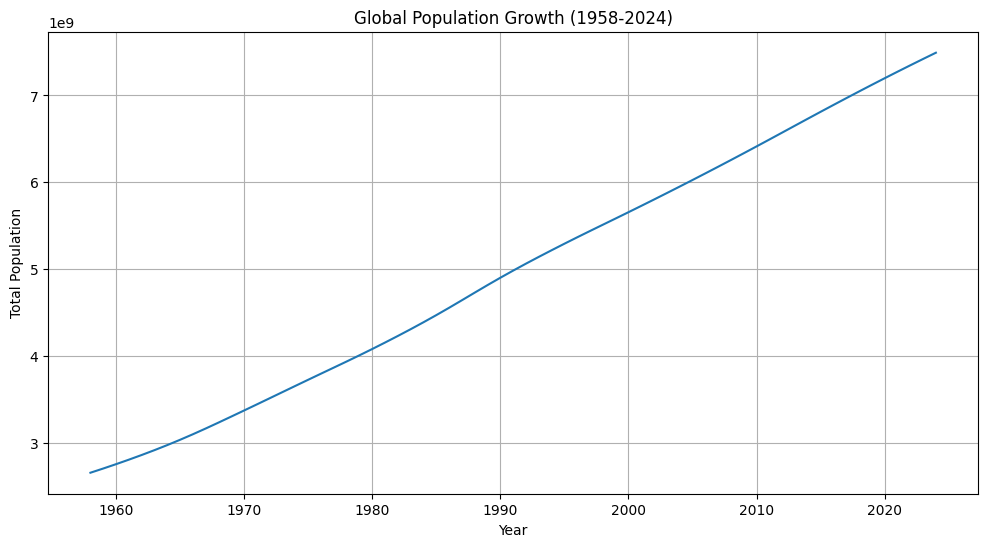

In [ ]:
# prompt: Plot the population data

plt.figure(figsize=(12, 6))
plt.plot(yearly_sums['Year'], yearly_sums['Total Population'])
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Global Population Growth (1958-2024)')
plt.grid(True)
plt.show()

Load the carbon dioxide data from the NOAA website
------
Data cleaned to skip the introduction and explanation text in the beginning of the data file.

In [ ]:
url2 = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv"
df2 = pd.read_csv(url2, skiprows=40)
df2

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
795,2024,6,2024.4583,426.91,424.47,20,0.65,0.28
796,2024,7,2024.5417,425.55,425.10,24,0.69,0.27
797,2024,8,2024.6250,422.99,424.82,22,1.08,0.44
798,2024,9,2024.7083,422.03,425.42,18,0.41,0.18


Generated code to make yearly averages
-----
Data cleaned so that only the averaged CO2 data is left

In [ ]:
# prompt: make a yearly averaged datset from df2

# Group by year and calculate the mean for each year
df2_yearly = df2.groupby('year').mean()

# Reset the index to make 'year' a regular column
df2_yearly = df2_yearly.reset_index()

# drop unneeded data columns
df2_yearly = df2_yearly.drop(df2_yearly.columns[[1, 2, 4, 5, 6, 7]], axis=1)

# Display the yearly averaged dataset
df2_yearly



,year,average
0,1958,315.237000
1,1959,315.981667
2,1960,316.908333
3,1961,317.643333
4,1962,318.453333
...,...,...
62,2020,414.212500
63,2021,416.414167
64,2022,418.528333
65,2023,421.075833


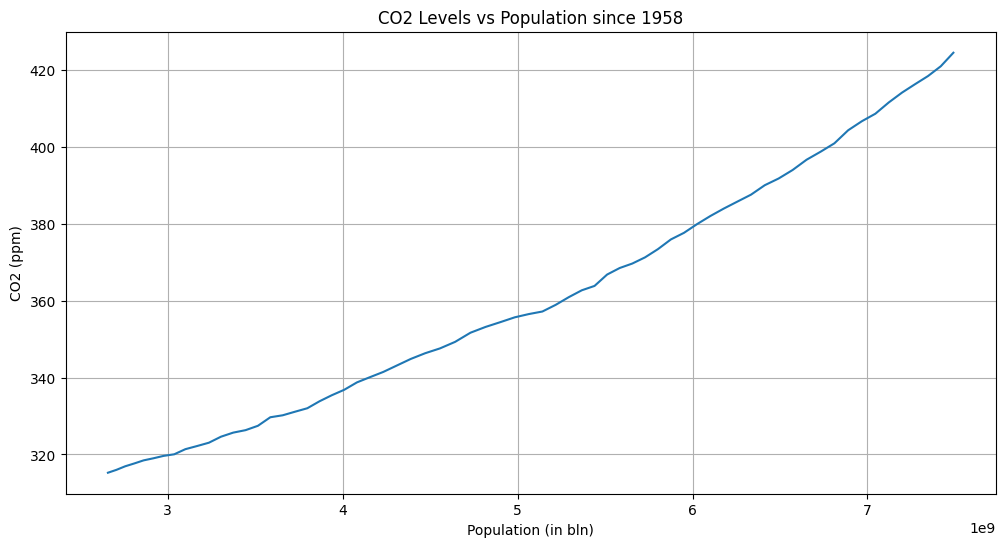

In [ ]:
# prompt: Plot the population data vs the yearly data

plt.figure(figsize=(12, 6))
plt.plot( yearly_sums['Total Population'],df2_yearly['average'])
plt.xlabel('Population (in bln)')
plt.ylabel('CO2 (ppm)')
plt.title('CO2 Levels vs Population since 1958')
plt.grid(True)
#plt.legend()
plt.show()

## Result

The interesting fact is that the relation CO2 with global population is slightly exponential. That indicates that